<div style="text-align:left">

## TF-IDF-based Steam Game Recommendation System

#### Mt. SAC CISB 63 Midterm Project Fall 2023

#### Kevin Buriel
    
#### This project is about creating a recommendation system based on video games featured on the Steam platform for PC. The dataset used is from Kaggle, located and downloaded from https://www.kaggle.com/datasets/nikatomashvili/steam-games-dataset. The description states that the data was scraped from Steam in early September 2023. A user will be able to input the name of a game that is on Steam, and will be given the top 10 recommendations based on the system's pairwise similarity. 
    
#### NLP (Natural Language Processing) techniques utilized: frequency distribution, Parts-of-Speech (POS) Tagging, Named Entity Recognition (NER) tagging, regular expression (regex), lowercase, wordCloud 
    
</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from wordcloud import WordCloud
from nltk import FreqDist
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import re

import seaborn as sns
%matplotlib inline

#import warnings and ignore them
import warnings
warnings.filterwarnings('ignore')


### Exploratory Data Analysis (EDA)

In [2]:
# read the dataset from the csv file and display the head
df = pd.read_csv("merged_data.csv", encoding='ISO-8859-1', error_bad_lines=False)
df.head()


,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldurâs Gate 3 is a story-rich, party-based...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | WindowsÂ® 7/Vista/XP | Processor: | In...
2,Apex Legendsâ¢,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of DutyÂ®,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of DutyÂ® HQ, the home of Call...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


In [3]:
# print the keys used in the dataset
print(df.keys())

Index(['Title', 'Original Price', 'Discounted Price', 'Release Date', 'Link',
       'Game Description', 'Recent Reviews Summary', 'All Reviews Summary',
       'Recent Reviews Number', 'All Reviews Number', 'Developer', 'Publisher',
       'Supported Languages', 'Popular Tags', 'Game Features',
       'Minimum Requirements'],
      dtype='object')


In [4]:
# describe the dataset
print(df.describe())

                  Title Original Price Discounted Price Release Date  \
count             71699          71700            71700        71569   
unique            71699            654              827         4441   
top     Baldur's Gate 3           Free             Free  Coming soon   
freq                  1          17585            17585         5887   

                                                     Link  \
count                                               71700   
unique                                              71700   
top     https://store.steampowered.com/app/1086940/Bal...   
freq                                                    1   

                                    Game Description Recent Reviews Summary  \
count                                          71489                  56480   
unique                                         71090                     18   
top     Find the objects that are hidden on the map.          Very Positive   
freq             

In [5]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   71699 non-null  object
 1   Original Price          71700 non-null  object
 2   Discounted Price        71700 non-null  object
 3   Release Date            71569 non-null  object
 4   Link                    71700 non-null  object
 5   Game Description        71489 non-null  object
 6   Recent Reviews Summary  56480 non-null  object
 7   All Reviews Summary     5371 non-null   object
 8   Recent Reviews Number   56480 non-null  object
 9   All Reviews Number      5371 non-null   object
 10  Developer               71480 non-null  object
 11  Publisher               71213 non-null  object
 12  Supported Languages     71700 non-null  object
 13  Popular Tags            71700 non-null  object
 14  Game Features           71700 non-null  object
 15  Mi

### Filling in missing values and errors in the dataset

In [6]:
# Check for missing data in each column
missing_data = df.isna().any()

In [7]:
# Print the columns with missing data
columns_with_missing_data = missing_data[missing_data].index
print("Columns with missing data:")
print(columns_with_missing_data)

Columns with missing data:
Index(['Title', 'Release Date', 'Game Description', 'Recent Reviews Summary',
       'All Reviews Summary', 'Recent Reviews Number', 'All Reviews Number',
       'Developer', 'Publisher', 'Minimum Requirements'],
      dtype='object')


In [8]:
# We know what columns have missing data, so we will fix this
# List of columns with missing data
columns_with_missing_data = [
    'Title', 'Release Date', 'Game Description', 'Recent Reviews Summary',
    'All Reviews Summary', 'Recent Reviews Number', 'All Reviews Number',
    'Developer', 'Publisher', 'Minimum Requirements'
]

# Fill missing data in the specified columns with empty strings
df[columns_with_missing_data] = df[columns_with_missing_data].fillna('')

# Now, if you check for missing data again, there should be none in these columns
missing_data = df[columns_with_missing_data].isna().any()
print("Columns with missing data after filling with empty strings:")
print(missing_data)

Columns with missing data after filling with empty strings:
Title                     False
Release Date              False
Game Description          False
Recent Reviews Summary    False
All Reviews Summary       False
Recent Reviews Number     False
All Reviews Number        False
Developer                 False
Publisher                 False
Minimum Requirements      False
dtype: bool


In [9]:
# Check for missing data in the "Game Description" column
missing_in_game_description = df['Game Description'].isna().any()

if missing_in_game_description:
    print("There are missing values in the 'Game Description' column.")
else:
    print("There are no missing values in the 'Game Description' column.")

There are no missing values in the 'Game Description' column.


### NLP technique: regex

In [10]:
# Define a regex pattern to match symbols that will cause issues with the system (trademark, copyright, etc)
pattern = r'[©™Â®â¢â„]'

# Remove the characters from the "Title" column using str.replace()
df['Title'] = df['Title'].str.replace(pattern, '', regex=True)

# Display the cleaned Titles 
df.head()

,Title,Original Price,Discounted Price,Release Date,Link,Game Description,Recent Reviews Summary,All Reviews Summary,Recent Reviews Number,All Reviews Number,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Minimum Requirements
0,Baldur's Gate 3,$29.99,$29.99,"3 Aug, 2023",https://store.steampowered.com/app/1086940/Bal...,"Baldurâs Gate 3 is a story-rich, party-based...",Overwhelmingly Positive,Very Positive,"- 96% of the 128,900 user reviews in the last ...","- 94% of the 188,617 user reviews for this gam...",Larian Studios,Larian Studios,"['English', 'French', 'German', 'Spanish - Spa...","['RPG', 'Choices Matter', 'Character Customiza...","['Single-player', 'Online Co-op', 'LAN Co-op',...",Requires a 64-bit processor and operating syst...
1,Counter-Strike: Global Offensive,$14.99,$14.99,"21 Aug, 2012",https://store.steampowered.com/app/730/Counter...,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,Very Positive,"- 89% of the 75,284 user reviews in the last 3...","- 88% of the 7,428,921 user reviews for this g...","Valve, Hidden Path Entertainment",Valve,"['English', 'Czech', 'Danish', 'Dutch', 'Finni...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['Steam Achievements', 'Full controller suppor...",OS: | WindowsÂ® 7/Vista/XP | Processor: | In...
2,Apex Legends,Free,Free,"4 Nov, 2020",https://store.steampowered.com/app/1172470/Ape...,"Apex Legends is the award-winning, free-to-pla...",Mixed,Very Positive,"- 65% of the 18,581 user reviews in the last 3...","- 80% of the 701,597 user reviews for this gam...",Respawn Entertainment,Electronic Arts,"['English', 'French', 'Italian', 'German', 'Sp...","['Free to Play', 'Multiplayer', 'Battle Royale...","['Online PvP', 'Online Co-op', 'Steam Achievem...",Requires a 64-bit processor and operating syst...
3,Forza Horizon 5,$34.78,$17.39,"8 Nov, 2021",https://store.steampowered.com/app/1551360/For...,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,Very Positive,"- 87% of the 4,120 user reviews in the last 30...","- 88% of the 123,162 user reviews for this gam...",Playground Games,Xbox Game Studios,"['English', 'French', 'Italian', 'German', 'Sp...","['Racing', 'Open World', 'Driving', 'Multiplay...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...
4,Call of Duty,Free,Free,"27 Oct, 2022",https://store.steampowered.com/app/1938090/Cal...,"Welcome to Call of DutyÂ® HQ, the home of Call...",Mixed,Mixed,"- 49% of the 8,257 user reviews in the last 30...","- 57% of the 236,876 user reviews for this gam...","Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"['English', 'French', 'Italian', 'German', 'Sp...","['FPS', 'Multiplayer', 'Shooter', 'Action', 'S...","['Single-player', 'Online PvP', 'Online Co-op'...",Requires a 64-bit processor and operating syst...


### NLP technique: frequency distribution

In [11]:
# We will use frequency distribution to check the top 10 most popular tags in our dataset
# and visualize it using matplotlib and seaborn
df['Popular Tags'] = df['Popular Tags'].apply(eval)

# Flatten the list of tags
tags = [tag for tag_list in df['Popular Tags'] for tag in tag_list]

# Calculate the frequency distribution of tags
tag_freq = FreqDist(tags)

# Get the top 10 most common tags
top_10_tags = tag_freq.most_common(10)

# Display the top 10 most popular tags
for tag, count in top_10_tags:
    print(f"{tag}: {count}")

Indie: 42593
Singleplayer: 41124
Action: 33695
Adventure: 30757
Casual: 30458
2D: 22105
Strategy: 15255
Simulation: 15061
3D: 14846
Atmospheric: 14385


### Visualizing data: top 10 most popular tags in the dataset

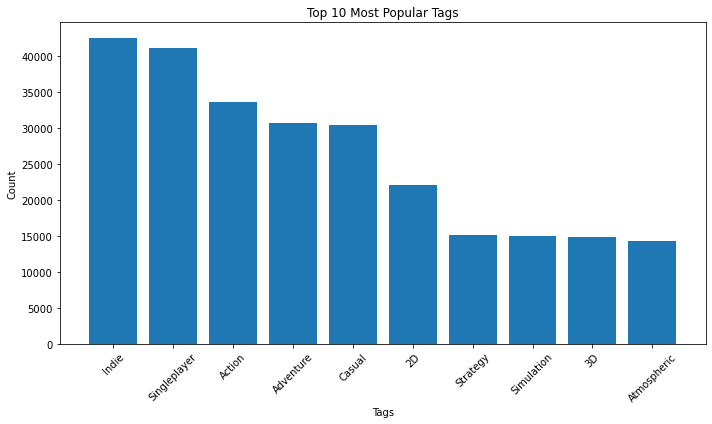

In [12]:
# Extract the tags and their counts
tags, counts = zip(*top_10_tags)
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(tags, counts)
plt.title('Top 10 Most Popular Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

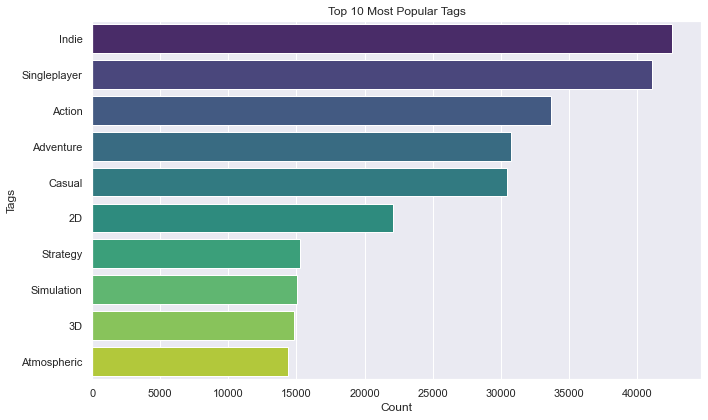

In [13]:
# Flatten the list of tags
tags = [tag for tag_list in df['Popular Tags'] for tag in tag_list]

# Calculate the frequency distribution of tags
tag_freq = pd.Series(tags).value_counts()

# Get the top 10 most common tags
top_10_tags = tag_freq.head(10)

# Create a countplot
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.countplot(y=tags, order=top_10_tags.index, palette="viridis")
plt.title('Top 10 Most Popular Tags')
plt.xlabel('Count')
plt.ylabel('Tags')

# Display the chart
plt.tight_layout()
plt.show()

### NLP technique: wordCloud

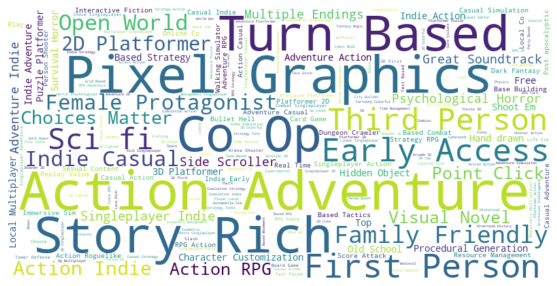

In [14]:
# Join the tags into a single string, separated by spaces
tags_text = " ".join(" ".join(tag) for tag in df['Popular Tags'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### NLP technique: Named Entity Recognition (NER) tags

In [15]:
# We'll display NER tags for the first five entries on the Game Description column of our dataset
from spacy import displacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Select the first 5 entries
sample_df = df.head(5)

# Process the 'Game Description' and 'Title' columns using spaCy
docs = []
for index, row in sample_df.iterrows():
    doc = nlp(row['Title'] + ": " + row['Game Description'])
    docs.append(doc)

# Define custom colors and options
colors = {'ORG': 'linear-gradient(90deg, #90EE90, #FFFFED)', 
          'PRODUCT': 'radial-gradient(silver, gold)', 
          'PERSON': 'radial-gradient(yellow, red)'}
options = {'ents': ['ORG', 'PRODUCT', 'PERSON'], 'colors': colors}

# Render NER tags for each description with the game's name using displacy with custom options
for doc in docs:
    displacy.render(doc, style='ent', jupyter=True, options=options)

### NLP technique: Parts-of-Speech (POS) tags

In [16]:
# Create an empty list to store the POS tags for each description
pos_tags_list = []

# Process the 'Game Description' column using spaCy and extract POS tags
for index, row in sample_df.iterrows():
    doc = nlp(row['Game Description'])
    pos_tags = [(token.text, token.pos_) for token in doc]
    pos_tags_list.append(pos_tags)

# Print the POS tags for the first five descriptions
for i, pos_tags in enumerate(pos_tags_list):
    print(f"Game Description #{i + 1} POS tags:")
    for word, pos in pos_tags:
        print(f"{word}: {pos}")
    print()

Game Description #1 POS tags:
Baldurâs: PROPN
Gate: PROPN
3: NUM
is: AUX
a: DET
story: NOUN
-: PUNCT
rich: ADJ
,: PUNCT
party: NOUN
-: PUNCT
based: VERB
RPG: PROPN
set: VERB
in: ADP
the: DET
universe: NOUN
of: ADP
Dungeons: PROPN
&: CCONJ
Dragons: PROPN
,: PUNCT
where: SCONJ
your: PRON
choices: NOUN
shape: VERB
a: DET
tale: NOUN
of: ADP
fellowship: NOUN
and: CCONJ
betrayal: NOUN
,: PUNCT
survival: NOUN
and: CCONJ
sacrifice: NOUN
,: PUNCT
and: CCONJ
the: DET
lure: NOUN
of: ADP
absolute: ADJ
power: NOUN
.: PUNCT

Game Description #2 POS tags:
Counter: PROPN
-: NOUN
Strike: NOUN
:: PUNCT
Global: PROPN
Offensive: PROPN
(: PUNCT
CS: PROPN
:: PUNCT
GO: PROPN
): PUNCT
expands: VERB
upon: SCONJ
the: DET
team: NOUN
-: PUNCT
based: VERB
action: NOUN
gameplay: NOUN
that: PRON
it: PRON
pioneered: VERB
when: SCONJ
it: PRON
was: AUX
launched: VERB
19: NUM
years: NOUN
ago: ADV
.: PUNCT
CS: NOUN
:: PUNCT
GO: PROPN
features: VERB
new: ADJ
maps: NOUN
,: PUNCT
characters: NOUN
,: PUNCT
weapons: NOUN
,:

### NLP technique: remove stopwords

In [17]:
#Define a TF-IDF Vectorizer Object. Remove all english stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [18]:
#Construct the required TF-IDF matrix by applying the fit_transform method on the Game Description feature
tfidf_matrix = tfidf.fit_transform(df['Game Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(71700, 60132)

### Constructing the recommender system using TF-IDF and cosine similarity

### NLP technique: lowercase

In [19]:
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [20]:
#Construct a reverse mapping of indices and game titles, and drop duplicate titles, if any
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [21]:
# Function that takes in game title as input and gives recommendations 
def content_recommender():
    while True:
        print("Hello, welcome to the Top 10 Steam Game Recommender. Please enter a title or type 'exit' to quit.")
        print("If the game's title uses roman numerals or uses the colon (:) character, please include it.")
        user_input = input("Enter a game title: ")

        # Check if the user wants to exit
        if user_input.lower() == 'exit':
            print("Goodbye!")
            break

        # Convert user input to lowercase
        user_input_lower = user_input.lower()

        # Check if the user input title (in lowercase) exists in the dataframe
        if user_input_lower not in df['Title'].str.lower().values:
            print("Game not found, please enter another title.")
        else:
            # Obtain the index of the game that matches the title
            idx = indices[df['Title'][df['Title'].str.lower() == user_input_lower].values[0]]
            
            # Get the pairwsie similarity scores of all games with that game
            # And convert it into a list of tuples as described above
            sim_scores = list(enumerate(cosine_sim[idx]))
            
            # Sort the games based on the cosine similarity scores
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            
            # Get the scores of the 10 most similar games. Ignore the first game.
            sim_scores = sim_scores[1:11]
            
            # Initialize a list to store the recommended games
            recommended_games = []

            for game_index in sim_scores:
                if 0 <= game_index[0] < len(df):
                    # Get the game details
                    game_info = {
                        "Title": df['Title'].iloc[game_index[0]],  
                        "Release Date": df['Release Date'].iloc[game_index[0]],
                        "Link": df['Link'].iloc[game_index[0]]
                    }
                    recommended_games.append(game_info)
                    
            # Print the formatted recommendations
            for idx, game_info in enumerate(recommended_games, start=1):
                print(f"Recommendation {idx}:")
                print(f"Title: {game_info['Title']}")
                print(f"Release Date: {game_info['Release Date']}")
                print(f"Link to game on Steam: {game_info['Link']}")
                print()

### Running the recommendation system

In [22]:
content_recommender()

Hello, welcome to the Top 10 Steam Game Recommender. Please enter a title or type 'exit' to quit.
If the game's title uses roman numerals or uses the colon (:) character, please include it.
Enter a game title: call of duty
Recommendation 1:
Title: Call of Duty: Modern Warfare 3 (2011)
Release Date: 7 Nov, 2011
Link to game on Steam: https://store.steampowered.com/app/115300/Call_of_Duty_Modern_Warfare_3_2011/?snr=1_7_7_230_150_11

Recommendation 2:
Title: Call of Duty: Black Ops
Release Date: 9 Nov, 2010
Link to game on Steam: https://store.steampowered.com/app/42700/Call_of_Duty_Black_Ops/?snr=1_7_7_230_150_7

Recommendation 3:
Title: Call of Duty: Modern Warfare III
Release Date: Coming soon
Link to game on Steam: https://store.steampowered.com/app/2519060/Call_of_Duty_Modern_Warfare_III/?snr=1_7_7_230_150_1626

Recommendation 4:
Title: Call of Duty: Modern Warfare II
Release Date: 27 Oct, 2022
Link to game on Steam: https://store.steampowered.com/app/1962660/Call_of_Duty_Modern_Warf

In [ ]:
content_recommender()

Hello, welcome to the Top 10 Steam Game Recommender. Please enter a title or type 'exit' to quit.
If the game's title uses roman numerals or uses the colon (:) character, please include it.


## Summary and Conclusion

### Using TF-IDF to create a recommendation system has been fairly accurate in some cases but not in others. In this model, if a user enters the title "Call of Duty", they will be recommended many, or even all, similar titles based on that game. I included links to each recommendation the system gives on the Steam platform so a user can see for themselves what games the system recommended for them with more in-depth information. However, upon testing the title "Dark Souls II", many of the games that the system recommended are not very similar to that game. Dark Souls II is an action-adventure game, and the system recommended titles like Puzzler World 2, which is a puzzle game. This might be due to the fact that the system is trained on using only the Game Description feature in the dataset, so using more features may give more accurate results.